In [1]:
from Norta import Norta as Nt

corr = 0.4
R = [[1, corr],[corr, 1]]

Prueba = Nt()
Prueba.set_marginal('normal', mu=15, sigma=1)
Prueba.set_marginal('uniform', a=10, b=20)
Prueba.set_corr_matrix(R)
sample_data = Prueba.generate_sample(1)
print(sample_data)

[[1, 0.4], [0.4, 1]] 1
Normal function successfully added
Uniform function successfully added
0.4
Calculated correlataion:
 [[1.  0.4]
 [0.4 1. ]]
[[14.49672403 14.75601211]]


In [2]:
import networkx as nx

In [3]:
class SANglobal:
    F = nx.DiGraph()
    a = 0
    b = 1
    c = 2
    d = 3
    inTo = 0
    F.add_nodes_from([a, b, c, d])
    F.add_edges_from([(a,b), (a,c), (b,c), (b,d), (c,d)])
    finishtime = 0

In [10]:
import matplotlib.pyplot as plt

#nx.draw(F)
#plt.show()

SANglobal.finishtime = 0
SANglobal.F.nodecomplete= []
for i in range(len(SANglobal.F.nodes())):
    eventname = 'Complete %1d' % i
    print(eventname)

Complete 0
Complete 1
Complete 2
Complete 3


In [12]:
for i in range(len(SANglobal.F.nodes())):
        activityname = 'Activity %1d' % i
        print(activityname)

Activity 0
Activity 1
Activity 2
Activity 3


In [13]:
SANglobal.F

In [14]:
SANglobal

__main__.SANglobal

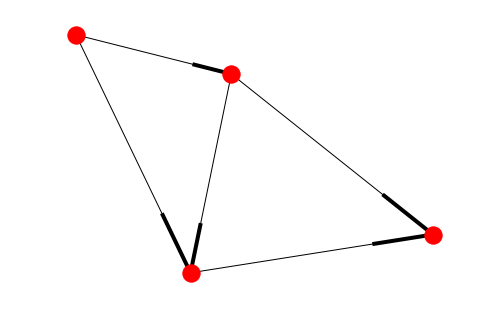

In [18]:
nx.draw(SANglobal.F)
plt.show()

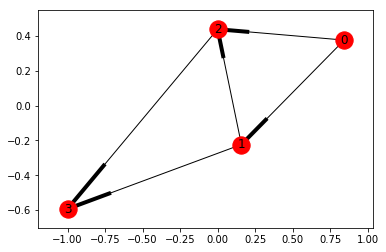

TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'

In [19]:
nx.draw_networkx(SANglobal.F)
plt.show()

In [20]:
nx.draw_networkx_nodes(SANglobal.F)
plt.show()

TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'

In [21]:
nx.draw_networkx_edges(SANglobal.F)
plt.show()

TypeError: draw_networkx_edges() missing 1 required positional argument: 'pos'

In [22]:
nx.draw_networkx_edge_labels(SANglobal.F)
plt.show()

TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'

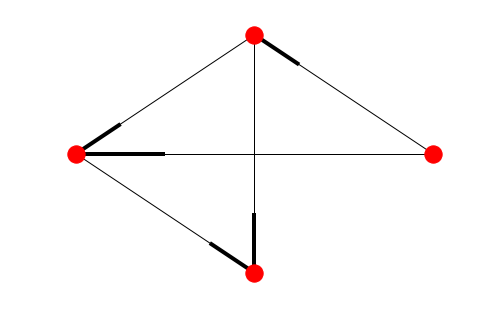

In [23]:
nx.draw_circular(SANglobal.F)
plt.show()

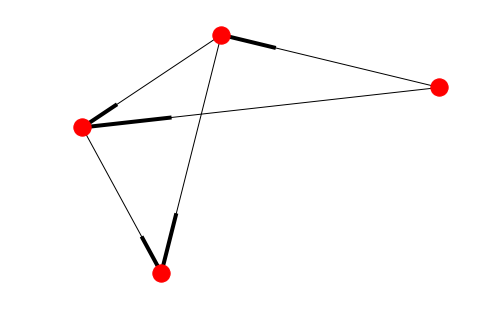

In [24]:
nx.draw_kamada_kawai(SANglobal.F)
plt.show()

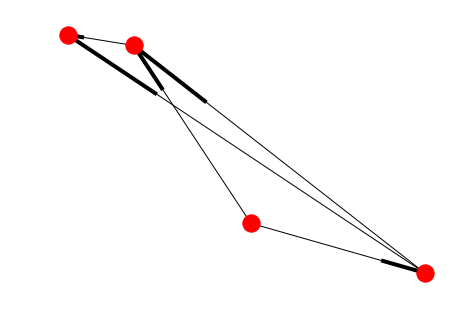

In [25]:
nx.draw_random(SANglobal.F)
plt.show()

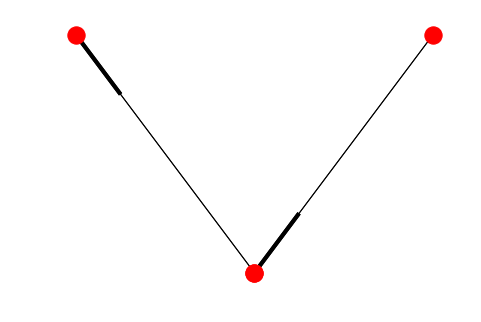

In [26]:
nx.draw_spectral(SANglobal.F)
plt.show()

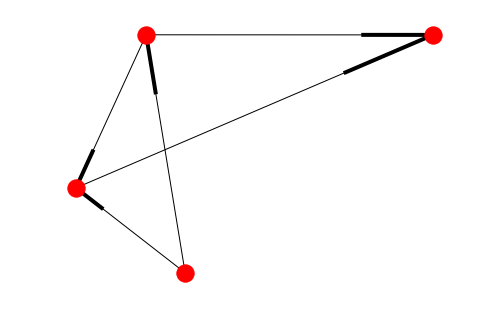

In [27]:
nx.draw_spring(SANglobal.F)
plt.show()

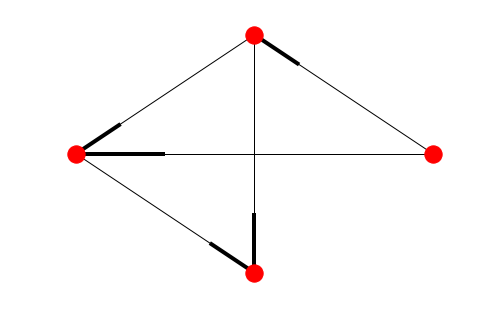

In [28]:
nx.draw_shell(SANglobal.F)
plt.show()

In [6]:
import random
import matplotlib.pyplot as plt
import simpy
import networkx as nx


class ActivityProcess(object):
    def __init__(self, env, name):
        self.env = env
        self.name = name
        
    def waitup(self,node, myEvent):
        # PEM illustrating "waitevent"# wait for "myEvent" to occur
        evnt = [e.event for e in myEvent]
        yield self.env.all_of(evnt)
        print("The activating event(s) were %s and time %f" %([x.name for x in myEvent],env.now))
        tis = random.expovariate(1.0)
        yield self.env.timeout(tis)
        finishtime = self.env.now
        if finishtime > SANglobal.finishtime:
            SANglobal.finishtime = finishtime
        SANglobal.F.nodecomplete[node].event.succeed()

class StartSignaller(object):
    # here we just schedule some events to fire
    def __init__(self, env, name,sEvent):
        self.env = env
        self.name = name
        self.sEvent = sEvent
        self.env.process(self.startSignals())
        
    def startSignals(self):
        yield self.env.timeout(0)
        self.sEvent.event.succeed()

class CustomEvent(object):
    def __init__(self,env, name):
        self.name = name
        self.env = env
        self.event = self.env.event()        
        
class SANglobal:
    F = nx.DiGraph()
    a = 0
    b = 1
    c = 2
    d = 3
    inTo = 0
    F.add_nodes_from([a, b, c, d])
    F.add_edges_from([(a,b), (a,c), (b,c), (b,d), (c,d)])
    finishtime = 0

finishtimes = []
for rep in range(1000):
    SANglobal.finishtime = 0
    env = simpy.Environment()
    SANglobal.F.nodecomplete= []
    for i in range(len(SANglobal.F.nodes())):
        eventname = 'Complete%1d' % i
        SANglobal.F.nodecomplete.append(CustomEvent(env,eventname))
    #SANglobal.F.nodecomplete

    activitynode = []
    for i in range(len(SANglobal.F.nodes())):
        activityname = 'Activity%1d' % i
        activitynode.append(ActivityProcess(env,activityname))
        
    for i in range(len(SANglobal.F.nodes())):
        if i is not SANglobal.inTo:
            prenodes = SANglobal.F.predecessors(i)
            preevents = [SANglobal.F.nodecomplete[j] for j in prenodes]
            env.process(activitynode[i].waitup(i,preevents))
            
    startevent = CustomEvent(env,'Start')
    sstart = StartSignaller(env,'Signal',startevent).startSignals()
    env.process(activitynode[SANglobal.inTo].waitup(SANglobal.inTo, [startevent]))
    
    env.run(until=50)
    finishtimes.append(SANglobal.finishtime)

plt.hist(finishtimes, bins = 30, normed = True, cumulative=True)  
plt.hist(finishtimes, bins = 30, normed = True, cumulative=False)   

The activating event(s) were ['Start'] and time 0.000000
The activating event(s) were ['Start'] and time 0.000000


TypeError: not all arguments converted during string formatting